In [2]:
import json
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data


In [3]:
import matplotlib.pyplot as plt

def plot_histogram_from_dict(data_dict, figsize=(20, 6), title='Histogram from Dictionary'):
    """
    Plots a histogram where keys of the dictionary are the bins
    and the values are the frequencies.

    Parameters:
    data_dict (dict): A dictionary where keys are the bins and values are the frequencies.
    """
    # Extract the keys (bins) and values (frequencies)
    bins = list(data_dict.keys())
    frequencies = list(data_dict.values())

    # Plot histogram
    fig, ax = plt.subplots(figsize=figsize) 
    
    # Set logarithmic scale for y-axis
    plt.bar(bins, frequencies, width=0.8, align='center')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [4]:
data_jsons = load_jsonl('/workdir/logs/20241220_190422_samples_CABBAGE_AgriExam.jsonl')

In [5]:
data_jsons[0].keys()


dict_keys(['doc_id', 'doc', 'target', 'arguments', 'resps', 'filtered_resps', 'doc_hash', 'prompt_hash', 'target_hash', 'exact_match', 'input'])

In [6]:
from collections import defaultdict
data_jsons[0]['doc']['subfield']
subfields = defaultdict(int)
subfields_wrong = defaultdict(int)

KeyError: 'subfield'

In [ ]:
for d in data_jsons:
    subfields[d['doc']['subfield']] +=1
    if d['acc'] == 0:
        subfields[d['doc']['subfield']] +=1

NameError: name 'subfields' is not defined

In [ ]:
sorted_dict = dict(sorted(subfields.items(), key=lambda item: -item[1]))
plot_histogram_from_dict(sorted_dict)

NameError: name 'subfields' is not defined

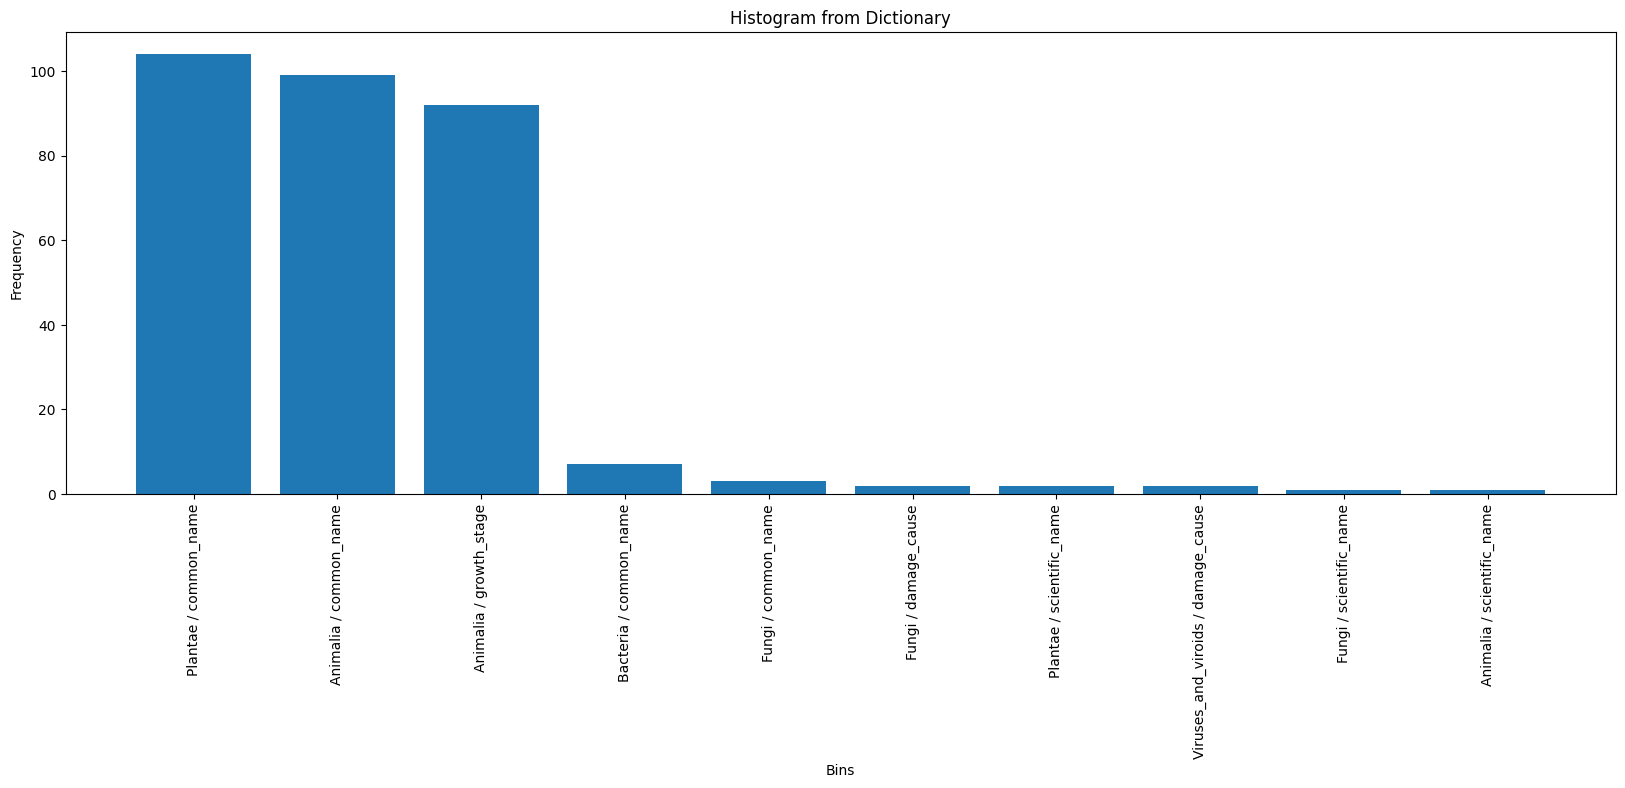

In [ ]:

sorted_dict = dict(sorted(subfields_wrong.items(), key=lambda item: -item[1]))
plot_histogram_from_dict(sorted_dict)

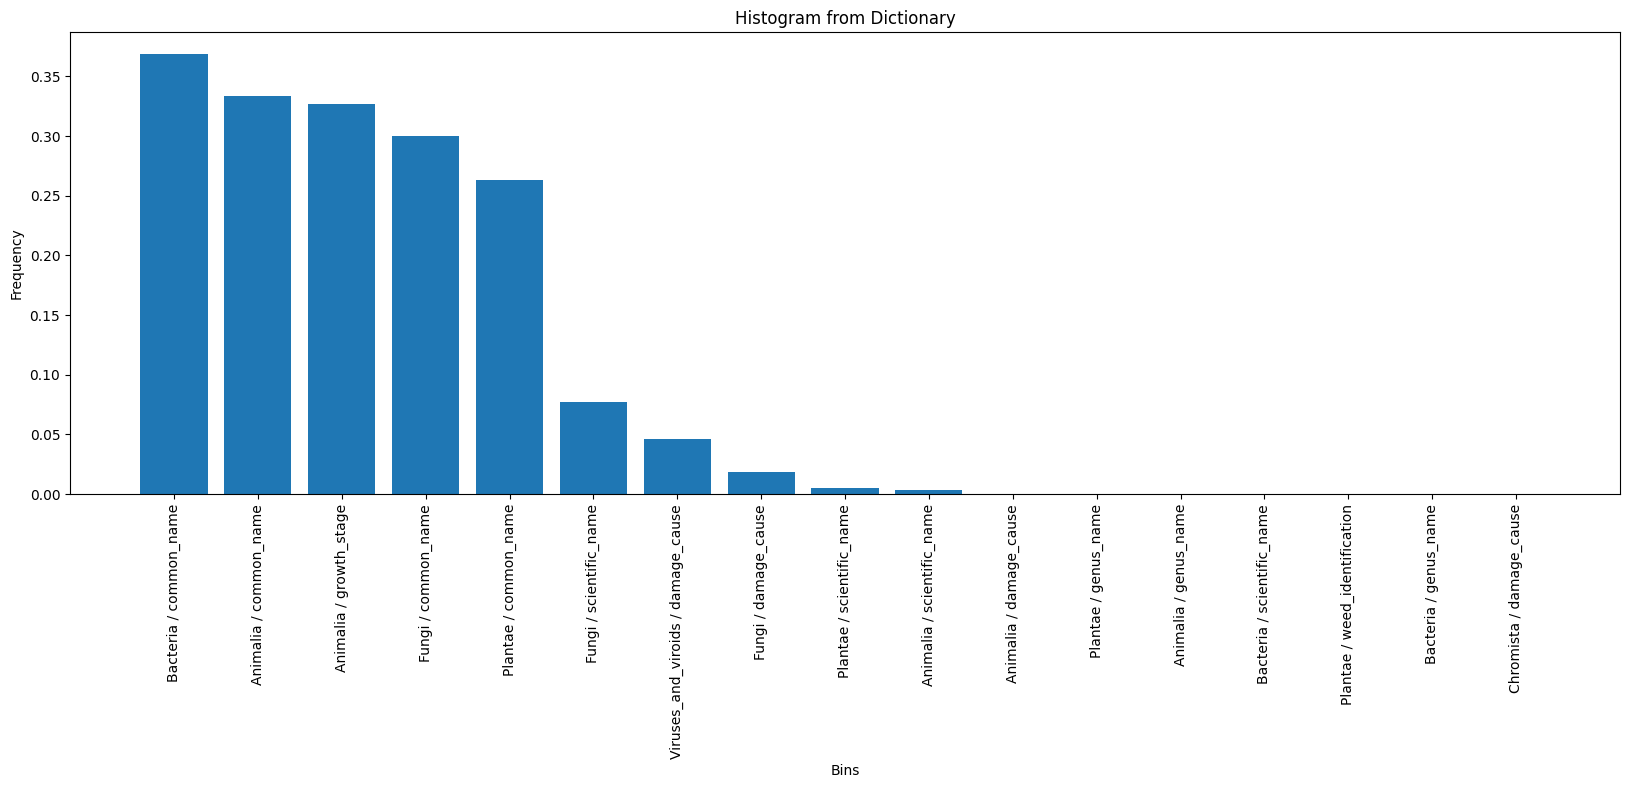

In [ ]:
percentage = {key:subfields_wrong[key]/subfields[key] for key in subfields}
sorted_dict = dict(sorted(percentage.items(), key=lambda item: -item[1]))
plot_histogram_from_dict(sorted_dict)

In [25]:
doc

{'doc_id': 11,
 'doc': {'id': 'dev_wikiHow_12',
  'question': 'Write down all the steps from the "Choosing a Herbicide" instructions in the "Kill Ferns" procedure.',
  'options': [],
  'answer': '1. Use boiling water as a cheap, natural herbicide.\n2. Douse the fern with saltwater as a quick herbicide.\n3. Spray the fern with vinegar in repeated applications.\n4. Use a chemical herbicide as the most effective fern killer.',
  'options_difficulty': None,
  'category': 'Planting-and-Growing',
  'subcategory': 'Growing-Trees-and-Shrubs',
  'question_type': 'open-ended',
  'question_template': 'open_question',
  'metadata': {'language': 'English',
   'license': '',
   'source': 'wikiHow',
   'url': 'https://www.wikihow.com/Kill-Ferns',
   'verbose_answer': '1. Use boiling water as a cheap, natural herbicide.\n2. Douse the fern with saltwater as a quick herbicide.\n3. Spray the fern with vinegar in repeated applications.\n4. Use a chemical herbicide as the most effective fern killer.'}},
 '

In [35]:
data_jsons = load_jsonl('/workdir/logs/20241224_010751_samples_CABBAGE_wikiHow.jsonl')
for doc in data_jsons:
    print(doc['doc']['question'])
    #print('Options',doc['doc']['options'])
    print(doc['doc']['answer'],'\nFiltered:\n',doc['filtered_resps'][0])
    print(doc['gpt_eval_score']['score'],doc['gpt_eval_score']['review'] )
    print('-------------------')

Write down all the steps from the "Making a Thumb-Controlled Watering Can" instructions in the "Make a Bottle Watering Can" procedure.
1. Find a large, plastic bottle or jug.
2. Clean out the bottle.
3. Drill a hole in the cap of your bottle.
4. Poke 6 to 15 small holes in the bottom of the bottle.
5. Fill the bottle in a bucket.
6. Unplug the cap to water your plants. 
Filtered:
 Sure, here are the steps from the "Making a Thumb-Controlled Watering Can" instructions in the "Make a Bottle Watering Can" procedure:

1. Gather materials:
* A plastic bottle with a narrow neck
* A piece of cardboard or stiff paper
* A piece of thin wire or a toothpick
* A small amount of glue
* A small amount of paint or ink
* A small amount of sand
* A small amount of water
1. Cut a small hole in the center of the piece of cardboard or stiff paper.
2. Cut a small slit in the side of the bottle, just below the narrow neck.
3. Push the wire or toothpick through the hole in the cardboard or stiff paper and in

In [43]:
data_jsons[3]

{'doc_id': 1,
 'doc': {'id': 'dev_wikiHow_2',
  'question': 'What step is missing from the "Using Weed Killer" instructions in the "Get Rid of a Wild Rose Bush" procedure?\n\nSteps:\n1. Choose an appropriate weed killer.\n2. Get rid of Wild Rose bushes in late summer, if possible.\n3. Follow the specific instructions provided with your chosen weed killer.\n4. Use a stump killer if you need to remove Wild Rose in winter.\n5. ........................................................\n6. Avoid using household chemicals to kill the rose bush.',
  'options': ['Wait for the rose bush to be completely dead before digging up the roots.',
   'Dig up the dead rose bush immediately after the first frost of the season.',
   'Wait several weeks before digging up the dead rose bush.',
   'Allow the dead rose bush to decompose for several weeks before digging up the soil.'],
  'answer': 'C',
  'options_difficulty': 4,
  'category': 'Garden-Pests-and-Weeds',
  'subcategory': None,
  'question_type': 'm

In [46]:
print(data_jsons[1]['gpt_eval_score']['content'])
print(data_jsons[1]['gpt_eval_score']['review'])

[Context]
Category: Landscaping-Plants

[Question]
Put these steps in the correct order for the "Preparing Your Planting Area" instructions in the "Plant Rye Grass" guide.

Steps: 1. Add fertilizer to the soil.
2. Choose the type of rye seed.
3. Fill in your soil as needed.
4. Choose the right time of year..

[Expert]
1. Choose the right time of year.
2. Choose the type of rye seed.
3. Fill in your soil as needed.
4. Add fertilizer to the soil.

[End of Expert]

[Assistant]
The correct order for the "Preparing Your Planting Area" instructions in the "Plant Rye Grass" guide is as follows:

1. Choose the right time of year.
2. Fill in your soil as needed.
3. Choose the type of rye seed.
4. Add fertilizer to the soil.

[End of Assistant]

[System]
We would like to request your feedback on the performance of an AI assistant in response to the user question displayed above, which pertains to agronomic knowledge. Please compare the assistant's response to a provided expert response to assess

In [14]:
data_jsons[0]['doc']['options_difficulty']
difficulties = defaultdict(int)
difficulties_wrong = defaultdict(int)

In [ ]:
for d in data_jsons:
    #if eval(d['doc']['metadata'])['tag'] != 'growth_stage':
        difficulties[d['doc']['options_difficulty']] +=1
        if d['acc'] == 0:
            difficulties_wrong[d['doc']['options_difficulty']] +=1

In [ ]:
difficulties_wrong

defaultdict(int, {'3': 102, '2': 86, '5': 128, '4': 92, '1': 126})

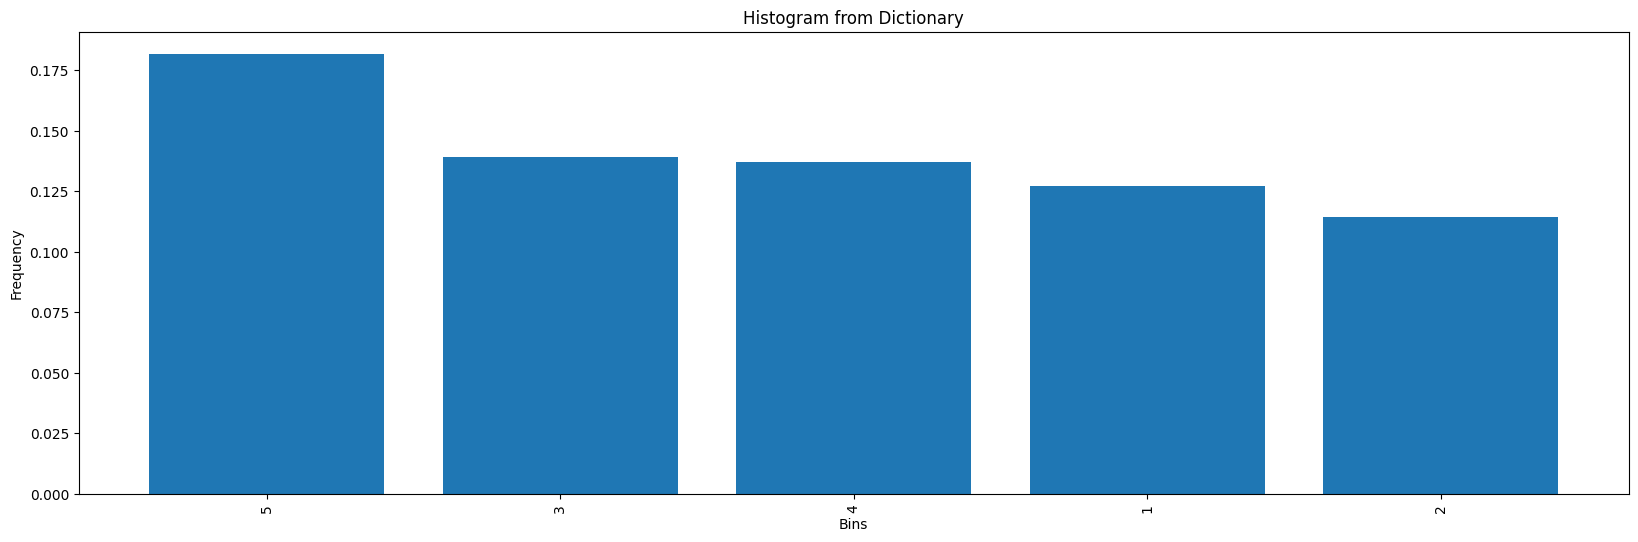

In [ ]:
percentage = {key:difficulties_wrong[key]/difficulties[key] for key in difficulties}
sorted_dict = dict(sorted(percentage.items(), key=lambda item: -item[1]))
plot_histogram_from_dict(sorted_dict)

In [ ]:
eval(data_jsons[0]['doc']['metadata'])

{'source': 'EPPO',
 'author': 'EPPO',
 'license': '',
 'url': 'https://gd.eppo.int/media/data/taxon/T/TTRCR/pics/1024x0/8275.jpg',
 'language': 'English',
 'verbose_answer': '{verbose_answer}',
 'eppo_code': 'TTRCR',
 'gbif_key': '2747939',
 'kingdom': 'Plantae',
 'tag': 'common_name',
 'common_name_language': 'English'}

In [ ]:
c=0
for d in data_jsons:
    if d['acc'] == 0:
        c+=1
        print(f'Question: {d['doc']['question']} | Options: {d['doc']['options']}')
        print(eval(d['doc']['metadata'])['url'])
        print(f'Real Answer: {d['doc']['answer']} | LLM Answer: {d['filtered_resps'][0]} | Accuracy: {d['acc']}')

Question: At what growth stage is this animal? <image 1> | Options: ['larva', 'pupa', 'egg', 'adult']
https://gd.eppo.int/media/data/taxon/V/VITEVI/pics/1024x0/1712.jpg
Real Answer: D | LLM Answer: A | Accuracy: 0.0
Question: At what growth stage is this animal? <image 1> | Options: ['egg', 'larva', 'pupa', 'adult']
https://gd.eppo.int/media/data/taxon/H/HPOSDD/pics/1024x0/10242.jpg
Real Answer: C | LLM Answer: B | Accuracy: 0.0
Question: What is the common name in English of this plant? <image 1> | Options: ['cheese fruit', 'Pyrenean gentian', 'num-num karroo', 'false jasmine']
https://gd.eppo.int/media/data/taxon/M/MOJCI/pics/1024x0/8703.jpg
Real Answer: A | LLM Answer: C | Accuracy: 0.0
Question: What is the common name in English of this animal? <image 1> | Options: ['little earwig', 'seaside earwig', 'common earwig', 'giant earwig, tawny earwig']
https://gd.eppo.int/media/data/taxon/F/FORFAU/pics/1024x0/7549.jpg
Real Answer: C | LLM Answer: A | Accuracy: 0.0
Question: What is the 

In [19]:
print(data_jsons[0]['filtered_resps'])

['A']
